<a href="https://colab.research.google.com/github/shannydi/FamilyPlanning/blob/main/Algae_Growth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ALGAE GROWTH IN WATER

## **A. Introduction**

Algae are a diverse group of photosynthetic organisms that are primarily aquatic but can also be found in terrestrial and even some extreme environments. They are simple, plant-like organisms that belong to various taxonomic groups, including green algae, brown algae, red algae, and diatoms. Algae can vary in size from microscopic unicellular forms to large, multicellular seaweeds.

An algae bloom is a rapid and excessive growth of algae in aquatic ecosystems, such as lakes, rivers, ponds, and oceans. These blooms can result in a substantial increase in the population of algae, leading to visible changes in the appearance and conditions of the affected water body. Algae blooms can vary in size, duration, and impact, and they may be harmful or beneficial depending on the types of algae involved and the environmental conditions.

Efforts to manage and mitigate the problems associated with algae blooms typically involve monitoring water quality, reducing nutrient inputs (e.g., from agriculture and wastewater), and implementing strategies to control and prevent blooms.

## **B. Problem Statement**



Algae blooms can be a problem for several reasons, as they can have significant ecological, environmental, and human health impacts. For example fish deaths e.g. in fisheries due to oxygen depletion, negative impact on growth of underwater vegetation, risk of toxins to humans etc.



## **C. Objectives**

**Specific Objectives**

1. To develop a model that best predicts the population of algae based on the environmental factors

2. To develop predictive models and algorithms that integrate the optimal nutrient measures with environmental variables for forecasting and managing algae population growth and the risk of algal blooms in various aquatic ecosystems.

**Assumptions:**

The data was collected accurately i.e., the experiements that collected the data were done accurately.

**Scope:**

- Data collection
- Exploratory Data Analysis
- Model development
- Data driven recommendations

## **D. Methodology**

### **1. Data Understanding**

**Data Source:** *Kaggle*

**Variables**

1. Light: Adequate light is essential for photosynthesis, a process through which algae convert sunlight into energy and biomass. Light levels affect the growth and distribution of algae in aquatic environments.

2.  Nitrate: Nitrate is a form of nitrogen found in water, and it serves as a nutrient for algae. Excessive nitrate concentrations, often resulting from agricultural runoff or wastewater discharge, can promote algal growth and potentially lead to algal blooms.

3.   Iron: Iron is another essential nutrient for algae, and its availability can influence algal bloom formation. Iron concentrations in water bodies can vary, and when iron is limiting, it may restrict the growth of certain types of algae.

4.  Phosphate: Phosphate is a key nutrient for algae, and its presence in water can stimulate algal growth. Elevated phosphate levels, often attributed to pollution sources, can contribute to nutrient enrichment and algal blooms.

5.  Temperature: Water temperature plays a significant role in determining the growth rates and seasonal patterns of algae. Warmer temperatures can accelerate algal growth, and certain species thrive in specific temperature ranges.

6.  pH: pH measures the acidity or alkalinity of water. Different algae species have varying pH preferences, and water with an optimal pH range can favor the growth of particular algae. Changes in pH can influence algal community composition.

7.   CO2 (Carbon Dioxide): CO2 is a carbon source that algae use during photosynthesis. The availability of dissolved CO2 can affect the rate of photosynthesis and algal biomass production. Changes in CO2 levels can impact algal growth dynamics.

8.   Population: The population variable likely refers to the abundance and composition of algae populations in a water body. Monitoring and quantifying the algal population are essential for understanding algal bloom dynamics, their timing, and severity.

### **2. Exploratory Data Analysis (EDA)**

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [ ]:
# load the dataset
df = pd.read_csv('algae.csv')

In [ ]:
df.shape

(9784, 8)

In [ ]:
df.columns

Index(['Light', 'Nitrate', 'Iron', 'Phosphate', 'Temperature', 'pH', 'CO2',
       'Population'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9784 entries, 0 to 9783
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Light        9784 non-null   float64
 1   Nitrate      9784 non-null   float64
 2   Iron         9784 non-null   float64
 3   Phosphate    9784 non-null   float64
 4   Temperature  9784 non-null   float64
 5   pH           9784 non-null   float64
 6   CO2          9784 non-null   float64
 7   Population   9784 non-null   float64
dtypes: float64(8)
memory usage: 611.6 KB


In [ ]:
df.head()

,Light,Nitrate,Iron,Phosphate,Temperature,pH,CO2,Population
0,1011.00,1.11,0.17,0.08,23.39,7.27,9.22,4736.51
1,1206.50,3.29,0.14,0.04,14.74,7.94,9.59,4677.34
2,1450.63,1.67,0.04,0.02,28.58,7.35,4.46,3388.85
3,1158.40,2.48,0.09,0.06,27.18,7.43,6.34,4899.17
4,1159.92,2.15,0.15,0.08,22.52,7.92,6.46,4974.25


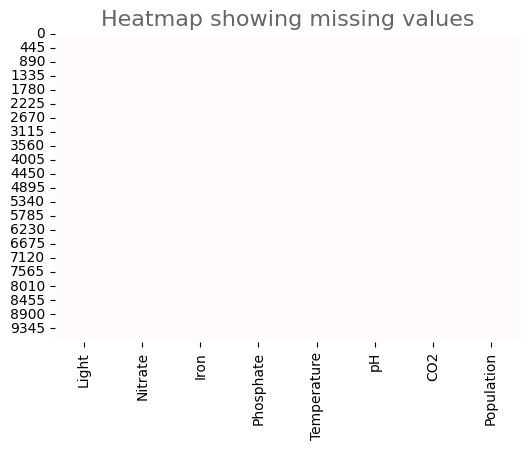

In [ ]:
plt.figure(figsize=(6,4) , dpi=100)
sns.heatmap(df.isna(), cmap='PuBu', cbar = False, alpha = 0.6)
plt.xticks(rotation=90)
plt.title ('Heatmap showing missing values',
           fontsize = 16,
           alpha = 0.6)
plt.show()

***There are no missing values***

In [ ]:
df['Population'].max()

5250.44

In [ ]:
df['Population'].min()

0.0

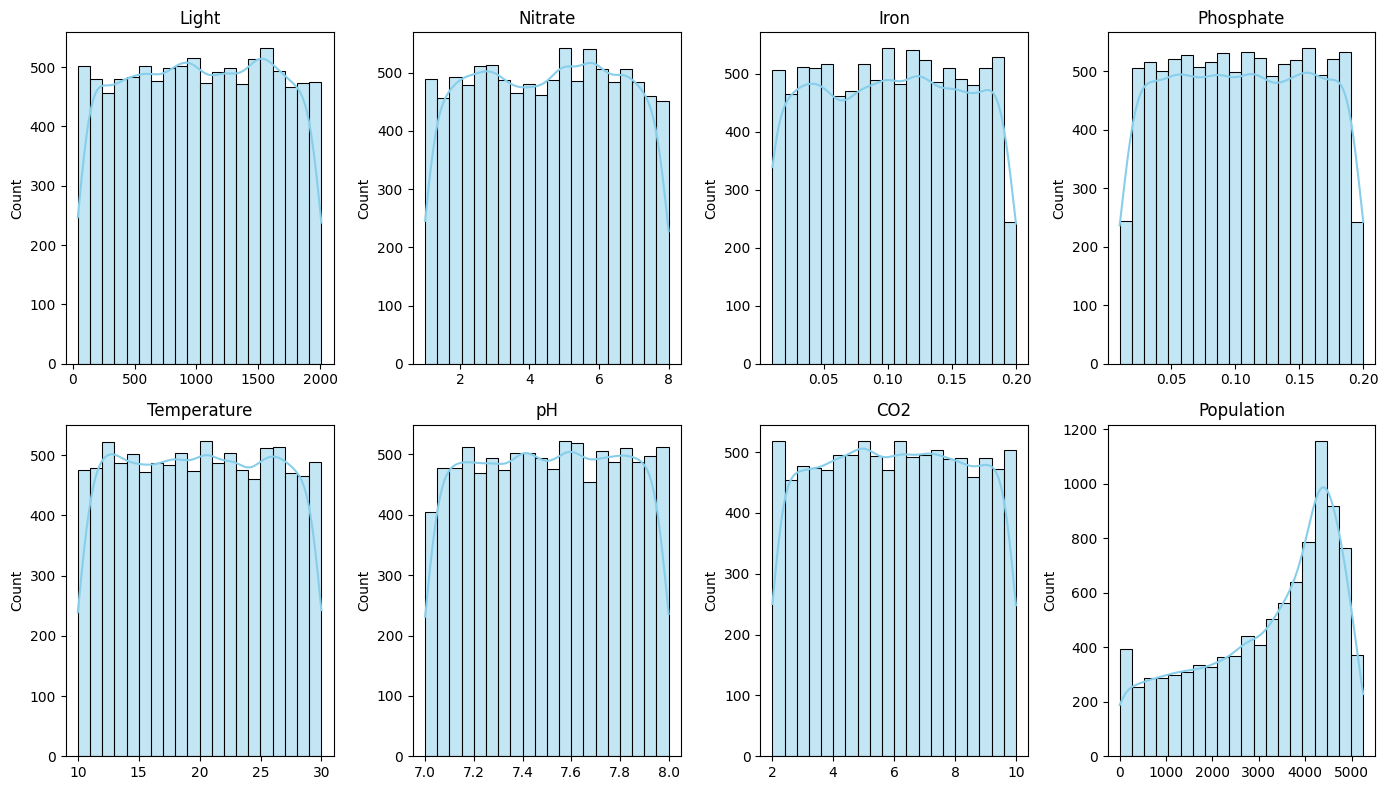

In [ ]:
# Define the list of variables you want to plot
variables_to_plot = ['Light', 'Nitrate', 'Iron', 'Phosphate', 'Temperature', 'pH', 'CO2', 'Population']

# Create multi-faceted histograms
plt.figure(figsize=(14, 8))
for i, var in enumerate(variables_to_plot, 1):
    plt.subplot(2, 4, i)  # 2 rows, 4 columns of subplots
    sns.histplot(df[var], bins=20, kde=True, color='skyblue')
    plt.title(var)
    plt.xlabel('')  # Remove x-axis label for better readability

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

***Algae population data is skewed to the left***

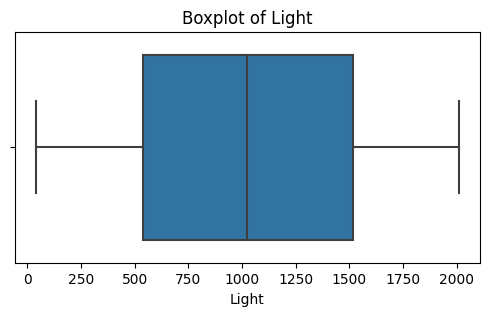

In [ ]:
# Create a boxplot of the 'Light' column
plt.figure(figsize=(6, 3))  # Optional: Set the figure size
sns.boxplot(x='Light', data=df)

# Set plot title and labels
plt.title('Boxplot of Light')
plt.xlabel('Light')

# Show the plot
plt.show()

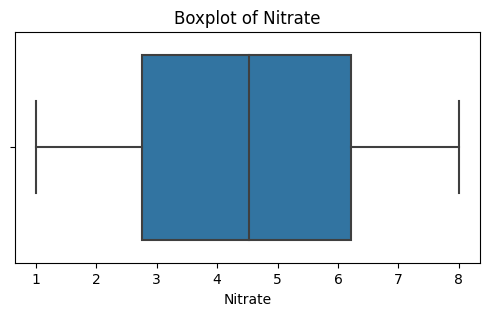

In [ ]:
# Create a boxplot of the 'Nitrate' column
plt.figure(figsize=(6, 3))  # Optional: Set the figure size
sns.boxplot(x='Nitrate', data=df)

# Set plot title and labels
plt.title('Boxplot of Nitrate')
plt.xlabel('Nitrate')

# Show the plot
plt.show()

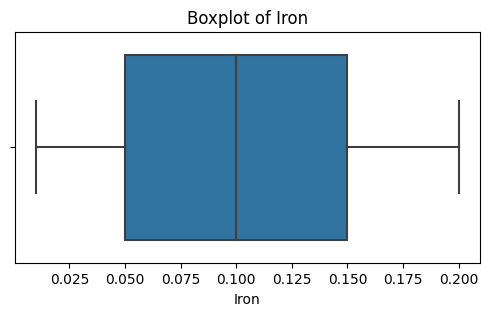

In [ ]:
# Create a boxplot of the 'Iron' column
plt.figure(figsize=(6, 3))  # Optional: Set the figure size
sns.boxplot(x='Iron', data=df)

# Set plot title and labels
plt.title('Boxplot of Iron')
plt.xlabel('Iron')

# Show the plot
plt.show()

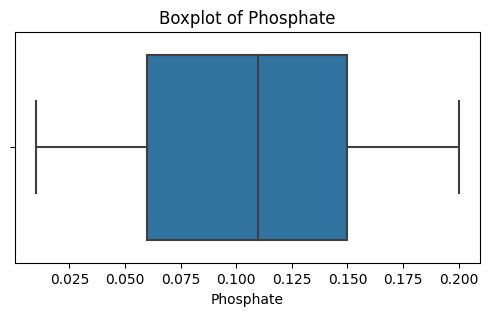

In [ ]:
# Create a boxplot of the 'Phosphate' column
plt.figure(figsize=(6, 3))  # Optional: Set the figure size
sns.boxplot(x='Phosphate', data=df)

# Set plot title and labels
plt.title('Boxplot of Phosphate')
plt.xlabel('Phosphate')

# Show the plot
plt.show()

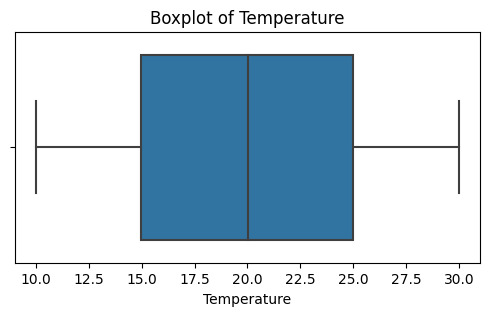

In [ ]:
# Create a boxplot of the 'Temperature' column
plt.figure(figsize=(6, 3))  # Optional: Set the figure size
sns.boxplot(x='Temperature', data=df)

# Set plot title and labels
plt.title('Boxplot of Temperature')
plt.xlabel('Temperature')

# Show the plot
plt.show()

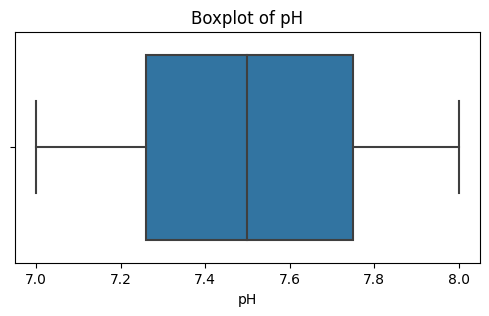

In [ ]:
# Create a boxplot of the 'pH' column
plt.figure(figsize=(6, 3))  # Optional: Set the figure size
sns.boxplot(x='pH', data=df)

# Set plot title and labels
plt.title('Boxplot of pH')
plt.xlabel('pH')

# Show the plot
plt.show()

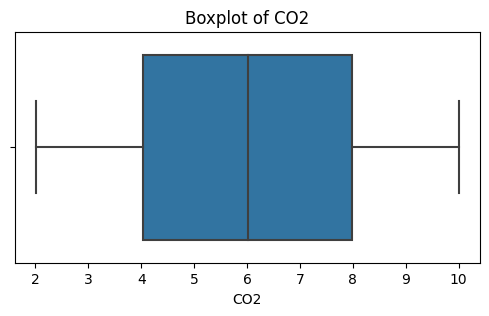

In [ ]:
# Create a boxplot of the 'CO2' column
plt.figure(figsize=(6, 3))  # Optional: Set the figure size
sns.boxplot(x='CO2', data=df)

# Set plot title and labels
plt.title('Boxplot of CO2')
plt.xlabel('CO2')

# Show the plot
plt.show()

***There were no outliers detected***

In [ ]:
df.describe()

,Light,Nitrate,Iron,Phosphate,Temperature,pH,CO2,Population
count,9784.000000,9784.000000,9784.000000,9784.000000,9784.000000,9784.000000,9784.000000,9784.000000
mean,1026.172916,4.493676,0.102977,0.105244,19.974967,7.502310,6.008941,3161.595503
std,565.252246,2.003815,0.056221,0.054843,5.756035,0.286528,2.299361,1460.094323
min,40.250000,1.000000,0.010000,0.010000,10.000000,7.000000,2.010000,0.000000
25%,539.925000,2.760000,0.050000,0.060000,14.960000,7.260000,4.040000,2055.460000
50%,1023.780000,4.530000,0.100000,0.110000,20.010000,7.500000,6.020000,3565.390000
75%,1516.085000,6.210000,0.150000,0.150000,25.000000,7.750000,7.980000,4374.555000
max,2009.860000,8.000000,0.200000,0.200000,29.990000,8.000000,10.000000,5250.440000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Light,9784.0,1026.172916,565.252246,40.25,539.925,1023.78,1516.085,2009.86
Nitrate,9784.0,4.493676,2.003815,1.00,2.760,4.53,6.210,8.00
Iron,9784.0,0.102977,0.056221,0.01,0.050,0.10,0.150,0.20
Phosphate,9784.0,0.105244,0.054843,0.01,0.060,0.11,0.150,0.20
Temperature,9784.0,19.974967,5.756035,10.00,14.960,20.01,25.000,29.99
pH,9784.0,7.502310,0.286528,7.00,7.260,7.50,7.750,8.00
CO2,9784.0,6.008941,2.299361,2.01,4.040,6.02,7.980,10.00
Population,9784.0,3161.595503,1460.094323,0.00,2055.460,3565.39,4374.555,5250.44


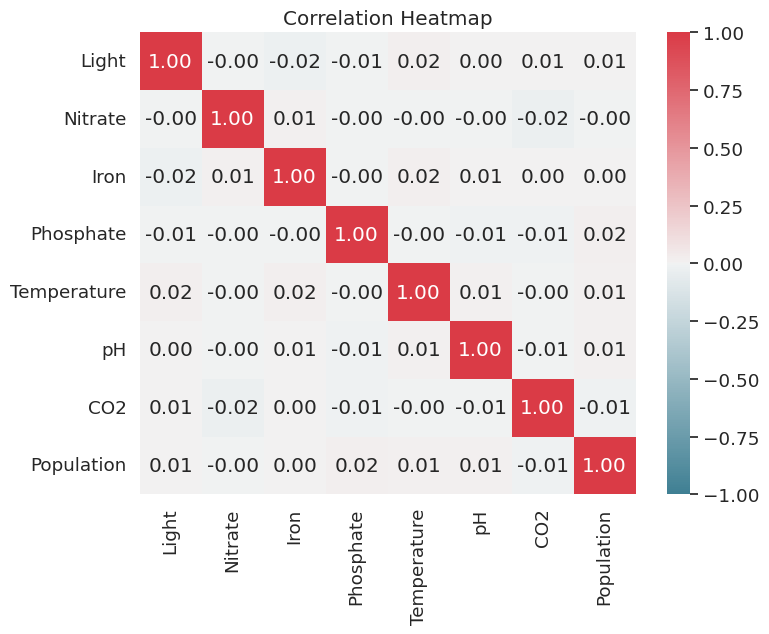

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a Seaborn heatmap
plt.figure(figsize=(8, 6))

# Customize the heatmap appearance (optional)
sns.set(font_scale=1.2)  # Adjust font size
sns.set_style("whitegrid")  # Set the style
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # Define color palette

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap, vmin=-1, vmax=1)

# Add a title
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()

In [ ]:
vars = df.columns.to_list()

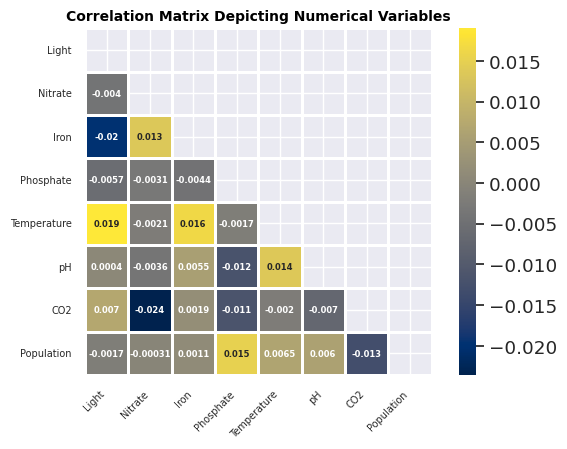

In [ ]:

sns.set_style("darkgrid")
corr_matrix = df[vars].corr(method = "spearman")
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

fig,ax = plt.subplots(figsize = (7,4.5))

sns.heatmap(corr_matrix,
            cmap = "cividis",
            annot = True,
            annot_kws = {"fontsize":6, "fontweight":"bold"},
            square = True,
            mask = mask,
            linewidths = 1.0,
            linecolor = "white",
            ax = ax)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right')
ax.tick_params(labelsize = 7)
ax.set_title('Correlation Matrix Depicting Numerical Variables', fontsize = 10, fontweight = 'bold', color = 'black')
fig.show()

### **3. Model Development**

To predict the population of algae in water based on the given variables ('Light', 'Nitrate', 'Iron', 'Phosphate', 'Temperature', 'pH', 'CO2'), you can use various regression machine learning models. Regression models are suitable for predicting a continuous target variable, such as population counts. Here are some regression models you can consider:

1. **Linear Regression:** Linear regression is a simple and interpretable model that assumes a linear relationship between the predictor variables and the target variable. It's a good starting point for regression tasks.

2. **Decision Tree Regression:** Decision tree regression models can capture complex non-linear relationships in the data. They are particularly useful when the relationship between predictors and the target variable is not strictly linear.

3. **Random Forest Regression:** Random forests are an ensemble learning method that combines multiple decision trees to improve predictive accuracy and reduce overfitting.

4. **Support Vector Regression (SVR):** SVR is a regression technique that uses support vector machines to find a hyperplane that best fits the data while minimizing errors.

5. **K-Nearest Neighbors Regressor:** KNN Regressor is a machine learning algorithm used for regression tasks that predicts a continuous target variable by averaging the values of its k-nearest neighbors.

In [ ]:
# make a copy of the dataset
df2 = df.copy()

In [ ]:
#create the target variable and attributes
X = df.drop('Population',axis=1).values
y = df['Population'].values

In [ ]:
# import the test train split library
from sklearn.model_selection import train_test_split

In [ ]:
# create the training and testing dataset

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
# import libraries to help standardize the features
from sklearn.preprocessing import StandardScaler

In [ ]:
# standardized the features (so that they fit on one scale)
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_train)
X_scaled_test = scaler.fit_transform(X_test)

In [ ]:
# use different machine learning models
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Create a dictionary of regression algorithms
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor()
}

# Create a dictionary for results
results = {}

# Loop through each regression algorithm
for name, reg in regressors.items():
    reg.fit(X_scaled, y_train)
    y_pred = reg.predict(X_scaled_test)

    # Calculate regression metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)

    results[name] = {
        'Mean Squared Error (MSE)': mse,
        'Root Mean Squared Error (RMSE)': rmse,
        'Mean Absolute Error (MAE)': mae,
        'R-squared (R2)': r_squared
    }

# Print results for each regression algorithm
for name, metrics in results.items():
    print(f"Regression Model: {name}")
    print(f"Mean Squared Error (MSE): {metrics['Mean Squared Error (MSE)']:.2f}")
    print(f"Root Mean Squared Error (RMSE): {metrics['Root Mean Squared Error (RMSE)']:.2f}")
    print(f"Mean Absolute Error (MAE): {metrics['Mean Absolute Error (MAE)']:.2f}")
    print(f"R-squared (R2): {metrics['R-squared (R2)']:.2f}")
    print("*" * 50)

Regression Model: Linear Regression
Mean Squared Error (MSE): 2157867.13
Root Mean Squared Error (RMSE): 1468.97
Mean Absolute Error (MAE): 1250.30
R-squared (R2): -0.00
**************************************************
Regression Model: Decision Tree Regressor
Mean Squared Error (MSE): 172496.70
Root Mean Squared Error (RMSE): 415.33
Mean Absolute Error (MAE): 339.67
R-squared (R2): 0.92
**************************************************
Regression Model: Random Forest Regressor
Mean Squared Error (MSE): 93274.61
Root Mean Squared Error (RMSE): 305.41
Mean Absolute Error (MAE): 258.46
R-squared (R2): 0.96
**************************************************
Regression Model: Support Vector Regressor
Mean Squared Error (MSE): 2257959.88
Root Mean Squared Error (RMSE): 1502.65
Mean Absolute Error (MAE): 1199.78
R-squared (R2): -0.05
**************************************************
Regression Model: K-Nearest Neighbors Regressor
Mean Squared Error (MSE): 546869.18
Root Mean Squared Erro

<ipython-input-23-10715f5412b3>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


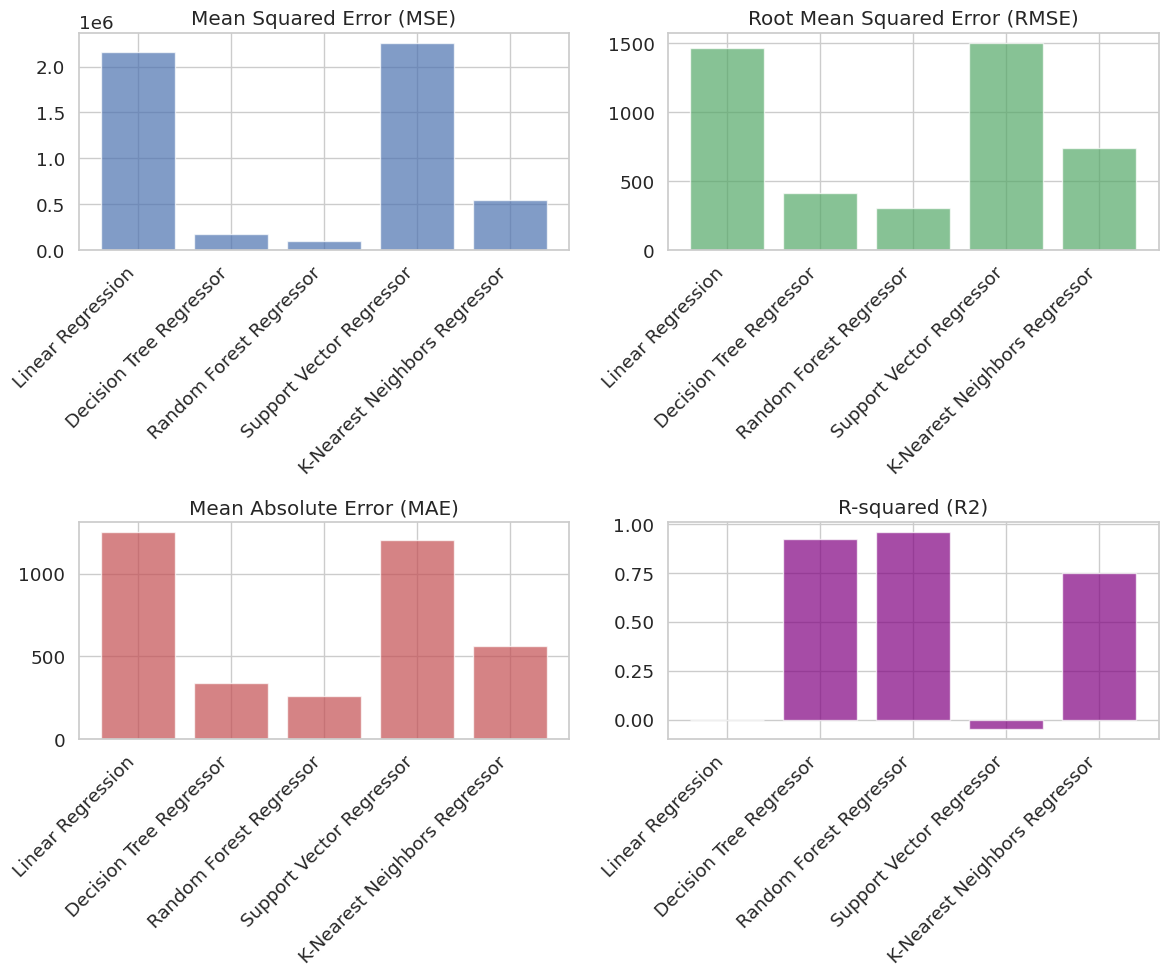

In [ ]:
# Regression models and their performance metrics
models = [
    "Linear Regression",
    "Decision Tree Regressor",
    "Random Forest Regressor",
    "Support Vector Regressor",
    "K-Nearest Neighbors Regressor",
]

mse = [2157867.13, 172071.27, 94169.63, 2257959.88, 546869.18]
rmse = [1468.97, 414.81, 306.87, 1502.65, 739.51]
mae = [1250.30, 338.95, 259.23, 1199.78, 565.28]
r2 = [-0.00, 0.92, 0.96, -0.05, 0.75]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot MSE
axs[0, 0].bar(models, mse, color='b', alpha=0.7)
axs[0, 0].set_title('Mean Squared Error (MSE)')

# Plot RMSE
axs[0, 1].bar(models, rmse, color='g', alpha=0.7)
axs[0, 1].set_title('Root Mean Squared Error (RMSE)')

# Plot MAE
axs[1, 0].bar(models, mae, color='r', alpha=0.7)
axs[1, 0].set_title('Mean Absolute Error (MAE)')

# Plot R2
axs[1, 1].bar(models, r2, color='purple', alpha=0.7)
axs[1, 1].set_title('R-squared (R2)')

# Rotate x-axis labels for better readability
for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## **E. Conclusion**

Based on these metrics:

1. Random Forest Regressor appears to have the lowest MSE, RMSE, and MAE, indicating better predictive performance in terms of accuracy and precision. It also has a high R-squared value (0.96), suggesting a good fit to the data.

2.  Decision Tree Regressor also performs well with a high R-squared value (0.92) and relatively low MSE, RMSE, and MAE.

3.   K-Nearest Neighbors Regressor has a moderate R-squared value (0.75) and higher errors compared to the Random Forest and Decision Tree models.

4.   Linear Regression and Support Vector Regressor show relatively poor performance in this case, with higher errors and lower R-squared values.


Prioritizng accuracy and precision the Random Forest Regressor is the best choice.
